In [1]:
from __future__ import division
import json
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression


In [2]:
import pandas as pd

dataset = pd.read_csv('1.csv',usecols=[0])


tmp_dataset=dataset
time=10
for i in range(1,time+1):
    result=tmp_dataset.shift(periods=i)
    dataset=pd.concat([dataset,result],axis=1)

In [3]:
dataset

,0,0,0,0,0,0,0,0,0,0,0
0,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,118,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,132,118.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,129,132.0,118.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,121,129.0,132.0,118.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
139,606,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0
140,508,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0
141,461,508.0,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0
142,390,461.0,508.0,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0


In [3]:
# Create the features (x) and target (y) data sets
train=dataset[time:round((dataset.shape[0]-time)*0.9)]
test=dataset[round((dataset.shape[0]-time)*0.9):]

# import sklearn machine learning library
from sklearn.model_selection import train_test_split

# Split the features and target datasets into training and test datasets
X_train = train.iloc[:, : -1].values
y_train = train.iloc[:, -1].values
X_test = test.iloc[:, : -1].values
y_test = test.iloc[:, -1].values


In [4]:
y_train

array([20.7, 17.9, 18.8, ..., 18.7, 16.2, 14.8])

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
dtc = GradientBoostingClassifier(loss='deviance', learning_rate=0.005, n_estimators=100,
                 subsample=1.0, min_samples_split=2,
                 min_samples_leaf=1, min_weight_fraction_leaf=0.,
                 max_depth=3, init=None, random_state=None,
                 max_features=None, verbose=0,
                 max_leaf_nodes=None, warm_start=False)


In [6]:
y_train=(y_train*10).astype('int')

In [7]:
y_train

array([207, 179, 188, ..., 187, 162, 148])

In [8]:
import time
time1=time.time()
dtc.fit(X_train,y_train)
time2=time.time()
print(time2-time1)

272.3489623069763


In [9]:
y_pred = dtc.predict(X_test)


In [10]:
y_pred=y_pred/10

In [11]:
print(y_pred)

[10.5 10.5 13.3 10.8 16.3 15.5 11.  13.  10.6 10.5 12.  18.6 11.  12.
  9.5 10.7 16.2 12.8 12.8 15.  14.4 13.3 15.  14.4 15.5 13.8 14.8 14.
 17.8 15.  15.2 11.  20.5 10.5 12.  16.2 12.2 13.3 13.3 14.5 16.2 19.5
 13.3 14.2 13.  13.3 15.  15.5 16.3 10.5 12.  15.  15.  15.  13.9 15.7
 14.2 12.8 16.5 16.1 12.5 13.9 14.2 14.2 16.3 17.  12.6 21.5 13.3 15.7
 15.7 15.2 13.9 23.9 14.4 14.4 14.4 20.5 19.4 17.8 16.2 20.5 18.5 14.5
 10.5 11.8 13.  13.8 11.9 11.  12.  19.  10.5 13.4 16.2 16.2 14.4 15.
 14.8 16.8 13.3 14.2 15.2 20.1 13.  10.5 13.6 15.2 15.  20.5 15.7 14.2
 16.1 16.2 14.4 14.4 16.2 13.3 17.  17.7 17.  10.5 10.6 11.8 12.  12.1
 13.  14.5 13.  10.6 12.5 12.5 12.5 10.5 10.5 10.5 11.9 10.6 16.5 10.6
 12.5 10.  16.7 10.   6.3  3.4  4.6 11.7 12.5 10.6  8.6 10.   8.  10.2
 15.2  8.   6.7  6.4  8.3  6.3  7.6 10.  10.   6.7 11.   8.3 10.6  8.
 10.   8.1 11.   8.  11.  12.6  7.   7.   8.   8.3  9.7  9.  11.2 13.
  9.   3.8  8.   7.   7.  11.   3.1  7.   7.7 12.2  6.6  8.  11.2  5.7
  5.7  8.  

In [14]:
import matplotlib.pyplot as plt
xx=[]
for i in range(round(y_pred.shape[0]/10)):
    xx.append(i)

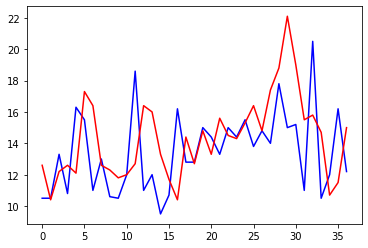

In [15]:
plt.plot(xx, y_pred[:len(xx)],c='b')
plt.plot(xx, y_test[:len(xx)],c='r')

In [16]:
data={'y_test':y_test}
frame=pd.DataFrame(data)
frame.to_csv('tmp_gdbt.csv')

In [17]:
from sklearn import metrics

print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.r2_score(y_test,y_pred))


10.349893048128342
2.479679144385027
0.2950778380090512
